<a href="https://colab.research.google.com/github/rcarasek/Python-for-Investment/blob/main/Python_For_FinanceFAANG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=O-O1WclwXck

In [2]:
# import libraries
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [3]:
# get the stock symbols
#FAANG
stockSymbols = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG' ]

In [4]:
stockStartDate = '2013-01-01'

In [5]:
today = datetime.today().strftime('%Y-%m-%d')
print(today)

2021-05-15


In [6]:
# get the number of assets in the portfolio
numAssets = len(stockSymbols)
print('You have ' + str(numAssets) + ' assets')

You have 5 assets


In [9]:
# Create a function to get the stock prices in the portfolio
def getMyPortfolio(stocks = stockSymbols , start = stockStartDate , end = today, col = 'Adj Close'):
  data = web.DataReader(stocks, data_source='yahoo', start=start, end=end )[col]
  return data


In [10]:
# get the stock portfolio
my_stocks = getMyPortfolio(stockSymbols)
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,17.010899,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.796177,13.798571,360.483826
2013-01-04,28.760000,259.149994,16.328323,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.232281,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.275965,13.880000,365.280823
...,...,...,...,...,...
2021-05-10,305.970001,3190.489990,126.849998,486.690002,2341.659912
2021-05-11,306.529999,3223.909912,125.910004,495.079987,2308.760010
2021-05-12,302.549988,3151.939941,122.769997,484.980011,2239.080078


In [11]:
# create the function to visualize the portfolio
def showGraph(stocks=stockSymbols , start=stockStartDate , end=today , col='Adj Close'):
  # titulo para o grafico
  title = 'Portfolio ' + col + ' price History'

  # get the stocks
  my_stocks = getMyPortfolio(stocks=stocks, start=start, end=end, col=col)

  # give the figure size
  plt.figure(figsize=(12,4))

  # loop thru each stock and plot the price
  for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)

  plt.title(title)
  plt.xlabel('Date', fontsize = 18)
  plt.ylabel(col+  'Price US$', fontsize = 18)
  plt.legend(my_stocks.columns.values, loc='upper left')
  plt.show()



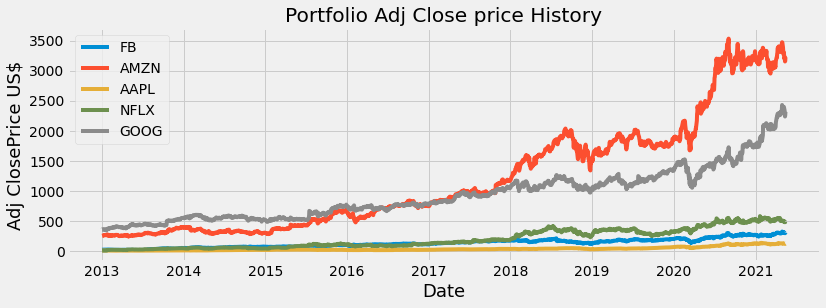

In [12]:
# Show the adj close price for FAANG
showGraph(stockSymbols)

In [16]:
# calculate the simple returns
daily_simple_returns = my_stocks.pct_change(1)

daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2021-05-10,-0.041087,-0.030721,-0.025805,-0.034039,-0.023775
2021-05-11,0.001830,0.010475,-0.007410,0.017239,-0.014050
2021-05-12,-0.012984,-0.022324,-0.024939,-0.020401,-0.030181


In [17]:
# Show the stock correlation
daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.526858,0.462101,0.362974,0.572428
AMZN,0.526858,1.000000,0.463122,0.456646,0.605240
AAPL,0.462101,0.463122,1.000000,0.275713,0.525709
NFLX,0.362974,0.456646,0.275713,1.000000,0.417749
GOOG,0.572428,0.605240,0.525709,0.417749,1.000000


In [18]:
# Show the covariance matrix for simple returns 
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000469,0.000219,0.000181,0.000227,0.000202
AMZN,0.000219,0.000369,0.000161,0.000253,0.000189
AAPL,0.000181,0.000161,0.000326,0.000144,0.000155
NFLX,0.000227,0.000253,0.000144,0.000832,0.000196
GOOG,0.000202,0.000189,0.000155,0.000196,0.000265


In [19]:
# Show the variance
daily_simple_returns.var()

Symbols
FB      0.000469
AMZN    0.000369
AAPL    0.000326
NFLX    0.000832
GOOG    0.000265
dtype: float64

In [20]:
# print the standard deviation for daily simple returns
print('The Stock Volatility:')
daily_simple_returns.std()

The Stock Volatility:


Symbols
FB      0.021667
AMZN    0.019197
AAPL    0.018066
NFLX    0.028847
GOOG    0.016293
dtype: float64

Text(0.5, 0, 'Date')

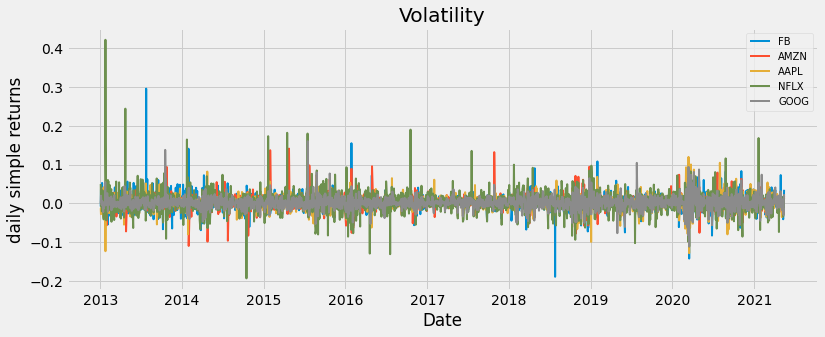

In [23]:
# visualize the stocks daily simple returns
plt.figure(figsize=(12,4.5))

# Loop thru each stock and plot the simple returns
for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns[c], lw=2, label=c)

# create the legend
plt.legend(loc='upper right', fontsize = 10)
plt.title('Volatility')
plt.ylabel('daily simple returns')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

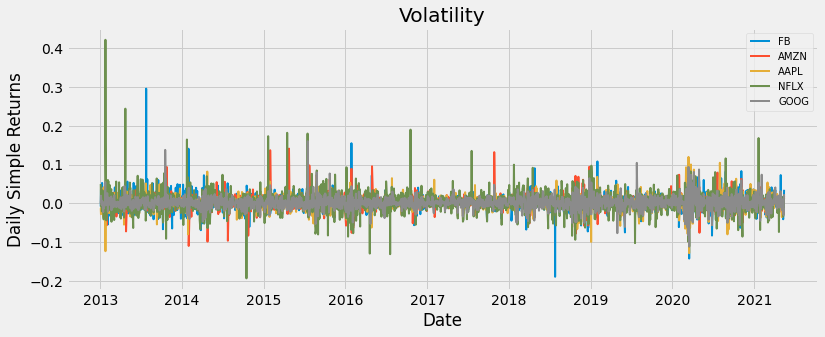

In [25]:
# visualize the stocks daily simple returns
plt.figure(figsize=(12,4.5))

# Loop thru each stock and plot the simple returns
for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns.index, daily_simple_returns[c], lw=2, label=c)

# create the legend
plt.legend(loc='upper right', fontsize = 10)
plt.title('Volatility')
plt.ylabel('Daily Simple Returns')
plt.xlabel('Date')

In [27]:
# Show the mean of the daily simple return
dailyMeanSimpleReturns =  daily_simple_returns.mean()
dailyMeanSimpleReturns

Symbols
FB      0.001383
AMZN    0.001384
AAPL    0.001120
NFLX    0.002125
GOOG    0.001016
dtype: float64

In [29]:
# Calculate the expected portfolio daily return
randomWeights = np.array([0.4, 0.1, 0.3, 0.1, 0.1])    #40% FB , 10% AMZN, 30% AAPL, 10% NTFX, 10% GOOG

portfolioSimpleReturn = np.sum(dailyMeanSimpleReturns * randomWeights)

# print the expected portfolio return
print('The daily expected portfolio return: ' + str(portfolioSimpleReturn))


The daily expected portfolio return: 0.0013417973838983784


In [30]:
# get the yearly simple return
print('Expected annualized portfolio simple return: '+ str(portfolioSimpleReturn * 253))   # 253 dias uteis com negociação

Expected annualized portfolio simple return: 0.33947473812628975


In [33]:
# calculate the growth of the investment
dailyCumulSimpleReturn = (daily_simple_returns + 1).cumprod()

# Show the cumulative simple return
dailyCumulSimpleReturn

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.991786,1.004547,0.987377,1.049777,1.000581
2013-01-04,1.027143,1.007151,0.959874,1.043147,1.020353
2013-01-07,1.050714,1.043333,0.954228,1.078144,1.015900
2013-01-08,1.037857,1.035249,0.956796,1.055972,1.013896
...,...,...,...,...,...
2021-05-10,10.927500,12.399402,7.456984,37.026735,6.499653
2021-05-11,10.947500,12.529284,7.401726,37.665034,6.408334
2021-05-12,10.805357,12.249582,7.217138,36.896641,6.214926


In [35]:
# (period_1 + 1) * (period_2 + 1)* .. * (period_n + 1)
(daily_simple_returns['GOOG'][1]+1) * (daily_simple_returns['GOOG'][2]+1)

1.0203525854692204

Text(0.5, 1.0, 'Daily Cumulative Simple Returns')

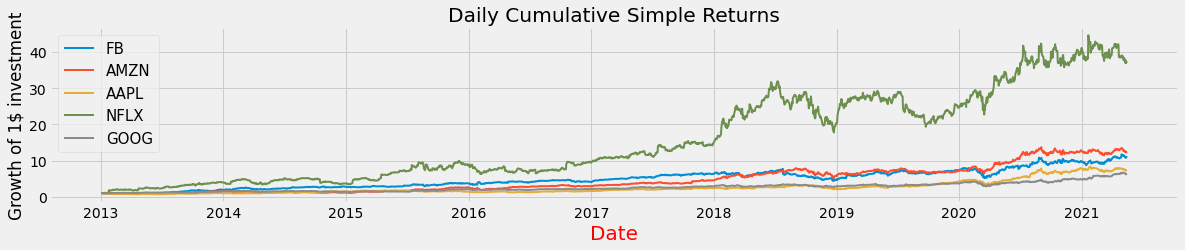

In [62]:
# visualize the daily cumulative simple returns
plt.figure(figsize=(18,3))
for c in dailyCumulSimpleReturn.columns.values:
  plt.plot(dailyCumulSimpleReturn.index, dailyCumulSimpleReturn[c], lw=2, label=c)

plt.legend(loc='upper left', fontsize=15)
plt.xlabel('Date', fontsize=20, color='red')
plt.ylabel('Growth of 1$ investment')
plt.title('Daily Cumulative Simple Returns')
# plt.show() 